# Machine Learning for Age Prediction using Volumetric Brain MRI

**Contributers: Jonathan Williams, Eddy Rosales, and Jesse Maki**

---

**Demographic Distribution of IXI.csv**

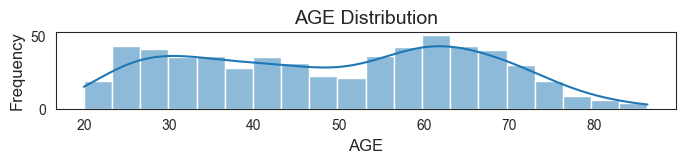

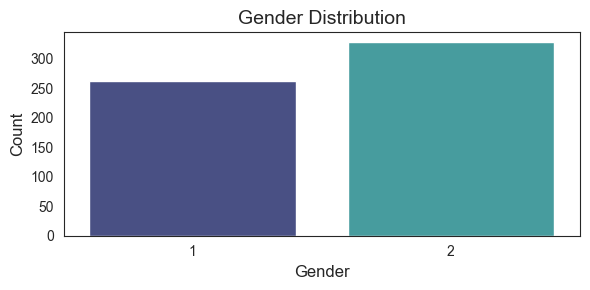

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('IXI.csv')

# Set seaborn style
sns.set_style("white")

# Variables for histograms
hist_vars = ['AGE']

# Create histograms
fig = plt.figure(figsize=(8, len(hist_vars)))

for i, var in enumerate(hist_vars, 1):
    plt.subplot(len(hist_vars), 1, i)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Add spacing between plots
plt.subplots_adjust(hspace=0.8)

# Gender bar plot
sex_fig = plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='SEX_ID', palette=sns.color_palette("mako", 2))
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Tight layout
plt.tight_layout()

# Show plots
plt.show()


## Segementation Comparisons - FSL vs SynthSeg on IXI Dataset

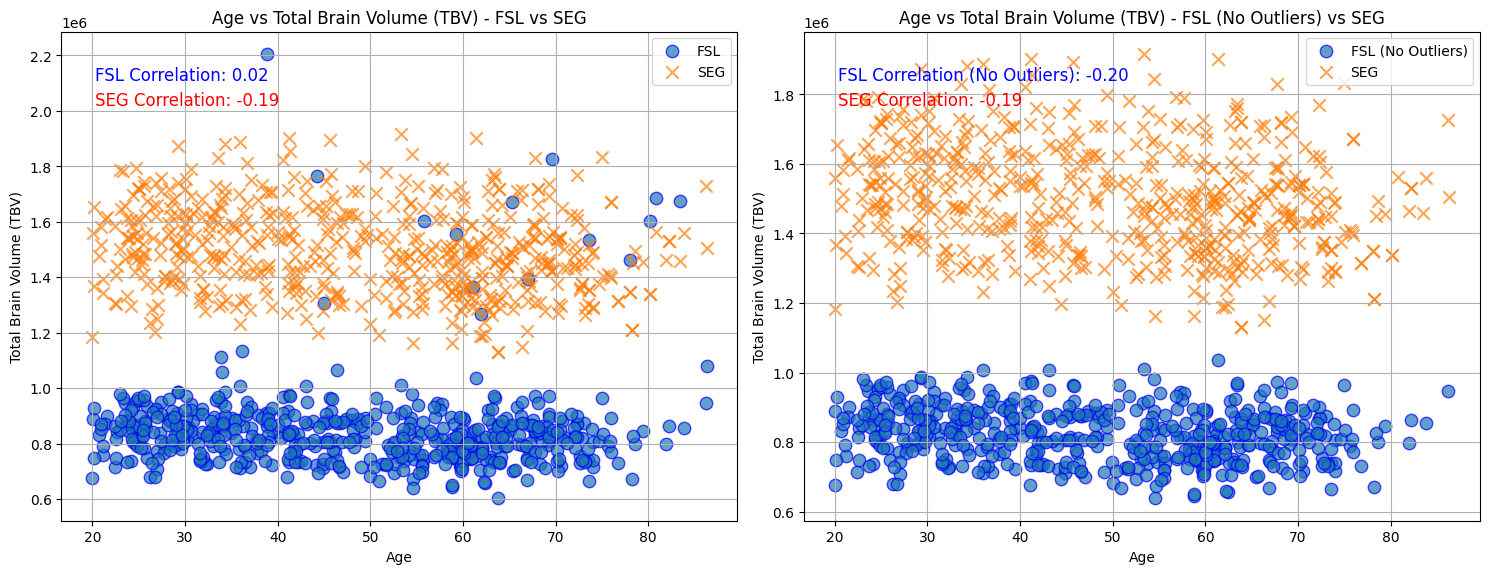

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
fsl_data = pd.read_csv('IXI-FSL.csv')
seg_data = pd.read_csv('IXI-SEG.csv')

# Extract necessary columns for plotting
fsl_age_tbv = fsl_data[['AGE', 'TBV']]
seg_age_tbv = seg_data[['AGE', 'TBV']]

# Calculate correlation coefficients
fsl_correlation = fsl_age_tbv['AGE'].corr(fsl_age_tbv['TBV'])
seg_correlation = seg_age_tbv['AGE'].corr(seg_age_tbv['TBV'])

# Remove outliers from FSL data using IQR method
Q1 = fsl_age_tbv['TBV'].quantile(0.25)
Q3 = fsl_age_tbv['TBV'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
fsl_age_tbv_no_outliers = fsl_age_tbv[(fsl_age_tbv['TBV'] >= lower_bound) & (fsl_age_tbv['TBV'] <= upper_bound)]

# Calculate correlation coefficients (using fsl_age_tbv_no_outliers DataFrame)
fsl_correlation_no_outliers = fsl_age_tbv_no_outliers['AGE'].corr(fsl_age_tbv_no_outliers['TBV'])

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot on the first subplot
axes[0].scatter(fsl_age_tbv['AGE'], fsl_age_tbv['TBV'], label='FSL', alpha=0.7, marker='o', edgecolors='b', s=80)
axes[0].scatter(seg_age_tbv['AGE'], seg_age_tbv['TBV'], label='SEG', alpha=0.7, marker='x', edgecolors='r', s=80)

axes[0].set_xlabel('Age')
axes[0].set_ylabel('Total Brain Volume (TBV)')
axes[0].set_title('Age vs Total Brain Volume (TBV) - FSL vs SEG')
axes[0].annotate(f'FSL Correlation: {fsl_correlation:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='b')
axes[0].annotate(f'SEG Correlation: {seg_correlation:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='r')
axes[0].legend()
axes[0].grid(True)

# Plot on the second subplot
axes[1].scatter(fsl_age_tbv_no_outliers['AGE'], fsl_age_tbv_no_outliers['TBV'], label='FSL (No Outliers)', alpha=0.7, marker='o', edgecolors='b', s=80)
axes[1].scatter(seg_age_tbv['AGE'], seg_age_tbv['TBV'], label='SEG', alpha=0.7, marker='x', edgecolors='r', s=80)

axes[1].set_xlabel('Age')
axes[1].set_ylabel('Total Brain Volume (TBV)')
axes[1].set_title('Age vs Total Brain Volume (TBV) - FSL (No Outliers) vs SEG')
axes[1].annotate(f'FSL Correlation (No Outliers): {fsl_correlation_no_outliers:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='b')
axes[1].annotate(f'SEG Correlation: {seg_correlation:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='r')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


This analysis highlights variations in volume calculations between the FSL and SynthSeg models for the same subjects. It becomes evident that the FSL module contains some outliers, which contribute to its lower volume correlation compared to the SynthSeg model. Specifically, the SynthSeg model exhibits a correlation of -0.19, which aligns with the expected trend of white matter decreasing as age increases.

After further examination, we conducted a data cleanup procedure by removing the outliers from the IXI-FSL.csv dataset. As a result, we observed a significant improvement in the volume correlation for the FSL model, with both models now showing practically matched correlations at approximately -0.20, with SynthSeg remaining at -0.19. These findings suggest that data preprocessing and outlier removal can play a crucial role in achieving more reliable and comparable results between the two models.

## Machine Learning Methods for Age-Volume Prediction

In this study, five machine learning models were tested to predict brain volumes using age and different brain metrics. The models included Linear Regression, Random Forest Regression, Extreme Gradient Boosting Regression (XGBRegressor), Light Gradient Boosting Machine Regressor (LGBMRegressor), and a 3D CNN model designed for FSL images. Linear Regression establishes a linear relationship, while Random Forest and XGBoost use ensemble techniques to handle non-linearities and improve accuracy. LGBMRegressor is a faster variant of gradient boosting, and the 3D CNN captures spatial information from FSL images.

The model uses two metrics to measure the accruacy of predictions:

1. Mean Absolute Error: $MAE = \frac{1}{n} \cdot Σ |yᵢ - ȳ|$ reflects how closely the model predicts ages are to the actual ages on average
<br>
2. $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{i} - \hat{y}{i})^{2}}{\sum{i=1}^{n} (y_{i} - \bar{y})^{2}}$ provides insight into how well the model captures the variance in age based on the provided volumes

The code loads the data, preprocesses it, performs train/test split, and standardizes the features. It then trains each model, evaluates its performance using R-squared and Mean Absolute Error, and plots the true age against the predicted age. The output shows how well each model predicts age using brain volume data.

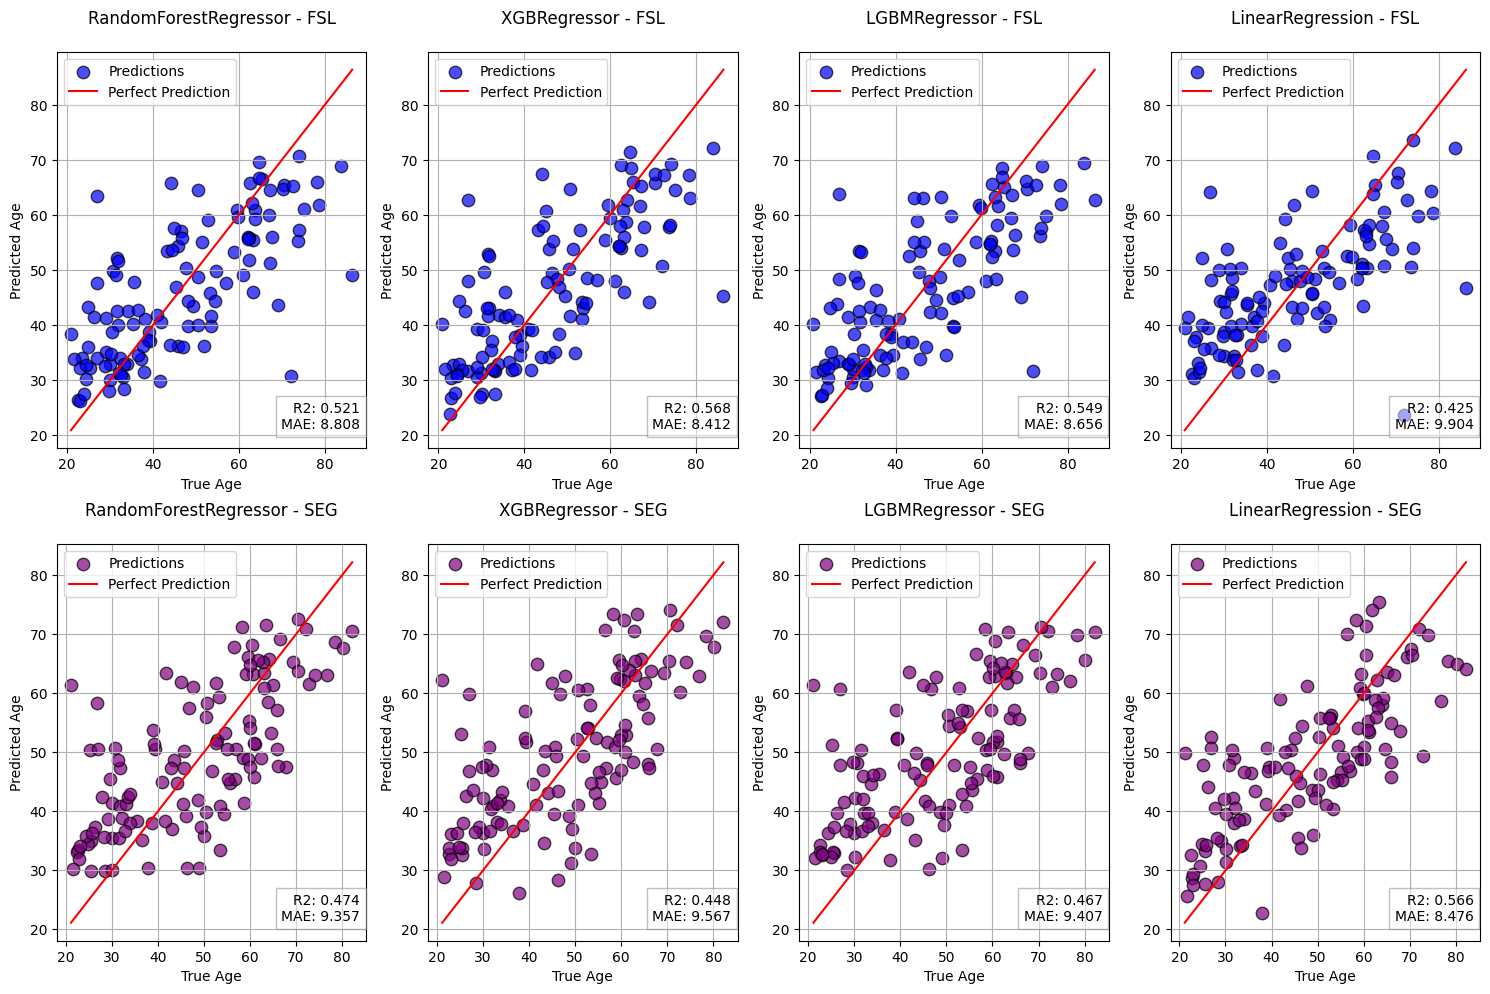

  Segment Method  Rank                  Model        R2       MAE
0            FSL     1           XGBRegressor  0.568367  8.412264
1            SEG     2       LinearRegression  0.566255  8.475762
2            FSL     3          LGBMRegressor  0.548780  8.655624
3            FSL     4  RandomForestRegressor  0.520962  8.807985
4            SEG     5  RandomForestRegressor  0.474067  9.357197
5            SEG     6          LGBMRegressor  0.466619  9.407201
6            SEG     7           XGBRegressor  0.447611  9.566752
7            FSL     8       LinearRegression  0.425447  9.903987


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Data and models
datasets = ['IXI-FSL.csv', 'IXI-SEG.csv']
models = {
    'FSL': [RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=4),
            XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, gamma=0),
            LGBMRegressor(n_estimators=300, max_depth=5, learning_rate=0.01, num_leaves=10, force_col_wise=True, verbose=-1),
            LinearRegression()],
    'SEG': [RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=4),
            XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, gamma=0),
            LGBMRegressor(n_estimators=300, max_depth=5, learning_rate=0.01, num_leaves=10, force_col_wise=True, verbose=-1),
            LinearRegression()]
}

# Colors for graphs
colors = {'FSL': 'blue', 'SEG': 'purple'}

results = {}  # Dictionary to store evaluation metrics

fig, axs = plt.subplots(len(datasets), len(models['FSL']), figsize=(15, 10))  # create a grid of plots
axs = axs.ravel()  # flatten the array for easy iterating

# add more space between plots
plt.subplots_adjust(hspace=0.5)

for i, dataset in enumerate(datasets):
    df = pd.read_csv(dataset)

    seg_name = 'FSL' if 'FSL' in dataset else 'SEG'

    # Extract features and target
    if seg_name == 'FSL':
        X = df[['CSF_VOLUME', 'GM_VOLUME', 'WM_VOLUME']]
    else:
        X = df[['TBV', 'WM_VOLUME', 'csf']]

    y = df['AGE']

    # Handle missing values
    X = X.fillna(X.mean())

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Model training and evaluation
    for j, model in enumerate(models[seg_name]):
        model.fit(X_train, y_train)

        preds = model.predict(X_test)

        r2 = r2_score(y_test, preds)
        mae = mean_absolute_error(y_test, preds)

        results[model.__class__.__name__ + f'-{seg_name}'] = {'R2': r2, 'MAE': mae}

        # Plot true vs predicted age
        ax = axs[i * len(models['FSL']) + j]  # select the current axis
        ax.scatter(y_test, preds, alpha=0.7, s=80, label='Predictions', color=colors[seg_name], edgecolors='k')
        ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='Perfect Prediction')
        ax.set_xlabel('True Age')
        ax.set_ylabel('Predicted Age')
        ax.set_title(f'{model.__class__.__name__} - {seg_name}', y=1.05)  # Adjust the y-position of the title
        ax.text(0.98, 0.05, f'R2: {r2:.3f}\nMAE: {mae:.3f}', transform=ax.transAxes,
                 ha='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
        ax.legend()
        ax.grid(True)

plt.tight_layout()  # improves appearance
plt.savefig('filename.png', dpi=300)
plt.show()

# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results).T

# Reset the index to create columns from the index values
df_results.reset_index(inplace=True)

# Split the index into 'Model' and 'Segment Method'
df_results[['Model', 'Segment Method']] = df_results['index'].str.split('-', expand=True)

# Drop the original 'index' column
df_results.drop(columns=['index'], inplace=True)

# Rank models based on R2 score (highest R2 gets rank 1)
df_results['Rank'] = df_results['R2'].rank(ascending=False).astype(int)

# Reorder the DataFrame columns to match the desired format
df_results = df_results[['Segment Method', 'Rank', 'Model', 'R2', 'MAE']]

# Sort the DataFrame by 'Rank'
df_results.sort_values(by='Rank', inplace=True)

# Reset the DataFrame index
df_results.reset_index(drop=True, inplace=True)

# Print the DataFrame
print(df_results)


## Deep Learning Model for Age-Volume Prediction

The implemented 3D Convolutional Neural Network (CNN) for a regression task uses TensorFlow and Keras. The model is designed to work with 3D volumetric data and predict continuous values. It consists of several convolutional blocks with ReLU activation, batch normalization, and max-pooling layers to learn meaningful representations from the input data. Dropout is applied to prevent overfitting. The model is compiled with the Adam optimizer and mean squared error (MSE) loss. Custom data generators are used to generate batches during training, ensuring efficient memory utilization. The training process includes learning rate reduction and early stopping callbacks to optimize performance and prevent overfitting. Overall, the model is a powerful tool for regression tasks involving 3D data.

**White matter 3D CNN for IXI-FSL.csv**

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, ReLU, BatchNormalization, Input, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

def data_generator(data, labels, batch_size):
    num_samples = len(data)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            x_batch = [np.array(data[i])[..., np.newaxis] for i in batch_indices]
            y_batch = labels[batch_indices]
            print(f"Generated a batch of size {len(x_batch)}")  # Added for debugging
            yield np.array(x_batch), y_batch

def create_cnn_block(input_layer, n_filters):
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(input_layer)
    x = ReLU()(x)
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=2)(x)
    x = Dropout(0.5)(x)
    return x

def create_3d_cnn(input_shape):
    input_layer = Input(shape=input_shape)
    x = create_cnn_block(input_layer, 8)
    x = create_cnn_block(x, 16)
    x = create_cnn_block(x, 32)
    x = create_cnn_block(x, 64)
    x = Flatten()(x)
    output_layer = Dense(1, activation='linear')(x)
    model = Model(input_layer, output_layer)
    return model

# Load the preprocessed data
data = np.load('preprocessed_data0.npz')
x_train, y_train, x_val, y_val, x_test, y_test = data['x_train'], data['y_train'], data['x_val'], data['y_val'], data['x_test'], data['y_test']

batch_size = 4
train_generator = data_generator(x_train, y_train, batch_size)
validation_generator = data_generator(x_val, y_val, batch_size)

image_shape = (128, 128, 128, 1)
model = create_3d_cnn(input_shape=image_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(train_generator, steps_per_epoch=len(x_train) // batch_size, epochs=50,
          validation_data=validation_generator, validation_steps=len(x_val) // batch_size,
          callbacks=[reduce_lr, early_stopping])


**Plot of True vs Predicted Age with perfect prediciton line of white matter IXI-FSL segmented images**

4/4 [==============================] - 1s 122ms/step


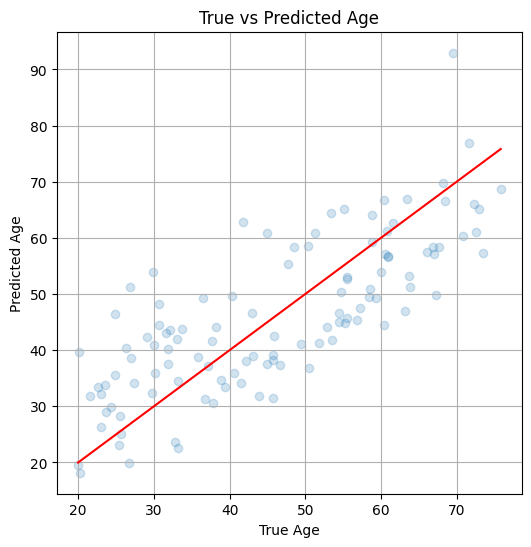

4/4 [==============================] - 2s 622ms/step
Mean Absolute Error (MAE): 8.598655541283744
Mean Squared Error (MSE): 100.91318239364956


In [ ]:
import matplotlib.pyplot as plt

# Predict the age on the test set
y_pred = model.predict(x_test)

# Plot true vs predicted age
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True vs Predicted Age')
plt.grid(True)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict the age on the test set
y_pred = model.predict(x_test)

# Compute MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")



**Gray matter 3D CNN for IXI-FSL segmented images**

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, ReLU, BatchNormalization, Input, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

def data_generator(data, labels, batch_size):
    num_samples = len(data)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            x_batch = [np.array(data[i])[..., np.newaxis] for i in batch_indices]
            y_batch = labels[batch_indices]
            print(f"Generated a batch of size {len(x_batch)}")  # Added for debugging
            yield np.array(x_batch), y_batch

def create_cnn_block(input_layer, n_filters):
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(input_layer)
    x = ReLU()(x)
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=2)(x)
    x = Dropout(0.5)(x)
    return x

def create_3d_cnn(input_shape):
    input_layer = Input(shape=input_shape)
    x = create_cnn_block(input_layer, 8)
    x = create_cnn_block(x, 16)
    x = create_cnn_block(x, 32)
    x = create_cnn_block(x, 64)
    x = Flatten()(x)
    output_layer = Dense(1, activation='linear')(x)
    model = Model(input_layer, output_layer)
    return model

# Load the preprocessed data
data = np.load('preprocessed_data1.npz')
x_train, y_train, x_val, y_val, x_test, y_test = data['x_train'], data['y_train'], data['x_val'], data['y_val'], data['x_test'], data['y_test']

batch_size = 4
train_generator = data_generator(x_train, y_train, batch_size)
validation_generator = data_generator(x_val, y_val, batch_size)

image_shape = (128, 128, 128, 1)
model = create_3d_cnn(input_shape=image_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(train_generator, steps_per_epoch=len(x_train) // batch_size, epochs=50,
          validation_data=validation_generator, validation_steps=len(x_val) // batch_size,
          callbacks=[reduce_lr, early_stopping])


**Plot of True vs Predicted Age with perfect prediciton line of gray matter IXI-FSL segmented images**

4/4 [==============================] - 1s 262ms/step


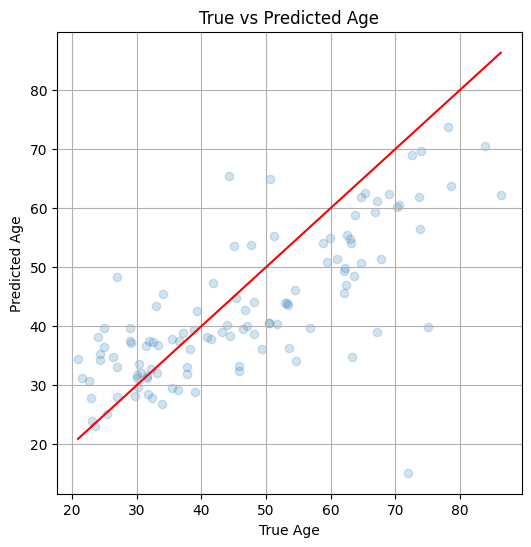

4/4 [==============================] - 2s 567ms/step
Mean Absolute Error (MAE): 8.83070656970539
Mean Squared Error (MSE): 140.08370673707034


In [ ]:
import matplotlib.pyplot as plt

# Predict the age on the test set
y_pred = model.predict(x_test)

# Plot true vs predicted age
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True vs Predicted Age')
plt.grid(True)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict the age on the test set
y_pred = model.predict(x_test)

# Compute MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")



**Plot of True vs Predicted Age with perfect prediciton line of entire brain scan on SynthSeg segmented images**

In [ ]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
from sklearn.model_selection import train_test_split
from scipy.ndimage import zoom

data_directory = '/content/drive/My Drive/Final-Project/IXI_synth_nii'
all_files = os.listdir(data_directory)
subject_list = [filename.replace('_synth.nii.gz', '') for filename in all_files if filename.endswith('_synth.nii.gz')]

def extract_numeric_id(subject_id):
    return int(''.join(filter(str.isdigit, subject_id)))

df = pd.read_csv('/content/drive/My Drive/Final-Project/IXI-SEG.csv')
df.drop_duplicates(subset='IXI_ID', keep='first', inplace=True)
demographic_dict = df.set_index('IXI_ID').to_dict(orient='index')

data_list = []
labels = []

def resize_volume(img):
    desired_depth = 128
    desired_width = 128
    desired_height = 128
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    img = zoom(img, (width_factor, height_factor, depth_factor))
    return img

for subject in subject_list:
    img = nib.load(os.path.join(data_directory, f"{subject}_synth.nii.gz"))
    img_data = resize_volume(img.get_fdata())
    img_data = img_data / np.max(img_data)
    subject_id = extract_numeric_id(subject)
    demographic_data = demographic_dict.get(subject_id)
    if demographic_data is None:
        print(f"Warning: No corresponding record found for image {subject}_synth.nii.gz")
        continue
    age = demographic_data['AGE']
    data_list.append(img_data)
    labels.append(age)
    print(f"Image {subject}_synth.nii.gz loaded successfully!")

labels = np.array(labels)
data_list = np.array(data_list)

x_temp, x_test, y_temp, y_test = train_test_split(data_list, labels, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

np.savez('/content/drive/My Drive/Final-Project/preprocessed_data_seg.npz', x_train=x_train, y_train=y_train, x_val=x_val, y_val=y_val, x_test=x_test, y_test=y_test)


In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, ReLU, BatchNormalization, Input, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

def data_generator(data, labels, batch_size):
    num_samples = len(data)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            x_batch = [np.array(data[i])[..., np.newaxis] for i in batch_indices]
            y_batch = labels[batch_indices]
            print(f"Generated a batch of size {len(x_batch)}")  # Added for debugging
            yield np.array(x_batch), y_batch

def create_cnn_block(input_layer, n_filters):
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(input_layer)
    x = ReLU()(x)
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=2)(x)
    x = Dropout(0.5)(x)
    return x

def create_3d_cnn(input_shape):
    input_layer = Input(shape=input_shape)
    x = create_cnn_block(input_layer, 8)
    x = create_cnn_block(x, 16)
    x = create_cnn_block(x, 32)
    x = create_cnn_block(x, 64)
    x = Flatten()(x)
    output_layer = Dense(1, activation='linear')(x)
    model = Model(input_layer, output_layer)
    return model

# Load the preprocessed data
data = np.load('/content/drive/My Drive/Final-Project/preprocessed_data_seg.npz')
x_train, y_train, x_val, y_val, x_test, y_test = data['x_train'], data['y_train'], data['x_val'], data['y_val'], data['x_test'], data['y_test']

batch_size = 4
train_generator = data_generator(x_train, y_train, batch_size)
validation_generator = data_generator(x_val, y_val, batch_size)

image_shape = (128, 128, 128, 1)
model = create_3d_cnn(input_shape=image_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(train_generator, steps_per_epoch=len(x_train) // batch_size, epochs=50,
          validation_data=validation_generator, validation_steps=len(x_val) // batch_size,
          callbacks=[reduce_lr, early_stopping])


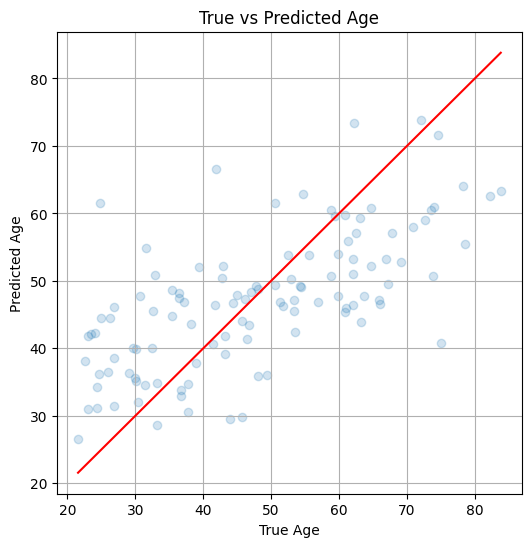

Mean Absolute Error (MAE): 9.938606079962074
Mean Squared Error (MSE): 150.12602584574114


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from numpy import log1p, expm1

# Apply a log1p transformation to y_train
y_train_log = log1p(y_train)

# Reshape the input data to be 2D
n_samples, height, width, channels = x_train.shape
x_train_reshaped = x_train.reshape((n_samples, height * width * channels))

# Initialize and train the model
model = LinearRegression()
model.fit(x_train_reshaped, y_train_log)

# Make prediction on the log scale (and reshape x_test in the same way as x_train)
x_test_reshaped = x_test.reshape((x_test.shape[0], height * width * channels))
y_pred_log = model.predict(x_test_reshaped)

# Convert the prediction back to the original scale
y_pred = expm1(y_pred_log)

# Plot true vs predicted age
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True vs Predicted Age')
plt.grid(True)
plt.show()

# Compute MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


## **Results**

The FSL model was evaluated for its performance in segmenting gray and white matter. For the gray matter, it recorded a Mean Absolute Error (MAE) of 8.83070656970539 and a Mean Squared Error (MSE) of 140.08370673707034. Similarly, the white matter segment reported an MAE of 8.598655541283744 and an MSE of 100.91318239364956. Although the FSL models focused only on a single feature at a time due to the computational intricacy, they managed to perform within the same threshold as more simplistic models like RandomForestRegressor and Linear Regression. It's noteworthy that while the latter models incorporated more features, adding more than two features for data processing in the FSL models was not feasible given the available resources, primarily due to the inherent complexity in calculations.

Following the FSL evaluation, the SynthSeg 3D CNN model was also assessed. This model, distinguished by its segmentation of the entire brain across 60 parameters, poses challenges in identifying specific parameters related to atrophy. Its MAE stood at 9.938606079962074 with an MSE of 150.12602584574114. Several nuances impacted these metrics. The model's architecture allows for only one type of segmented volume image during both training and testing phases, in contrast to models that can handle multiple volume types. The dataset size is relatively small compared to standard datasets used for age-volume predictions. Additionally, there's a pronounced age distribution leaning towards the 25-30 and 55-70 age groups, which could have influenced its accuracy.

